TASK 2 : Hierarchical Clustering using machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
#Import dataset
X = pd.read_csv('P2_DATASET.csv')

X = X.drop('Species', axis = 1)

X.fillna(method ='ffill', inplace = True)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)

In [4]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

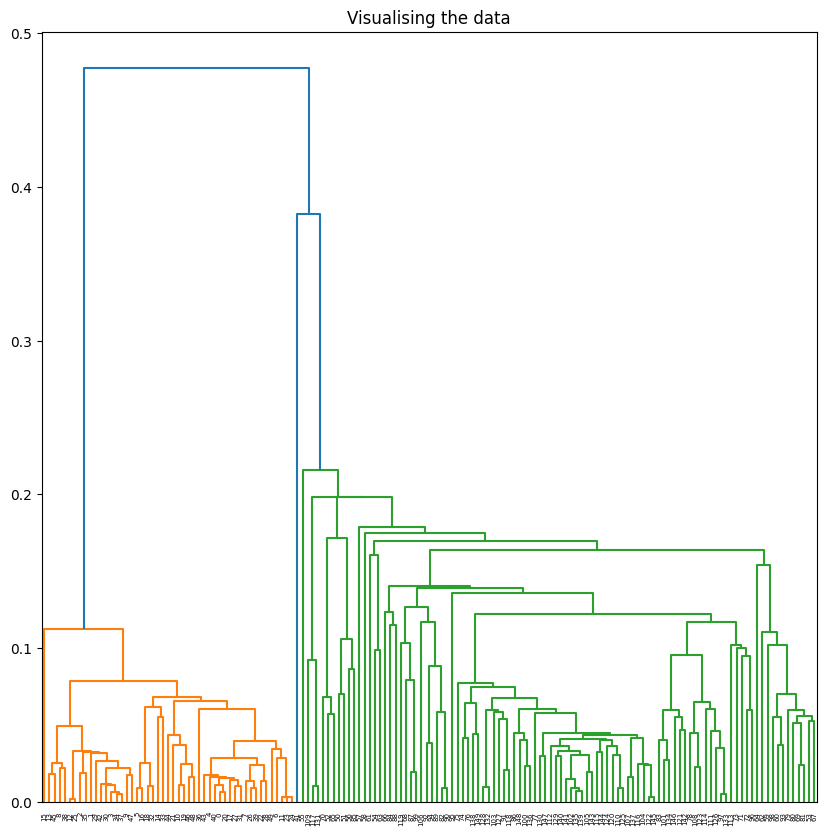

In [5]:
plt.figure(figsize =(10, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='single')))

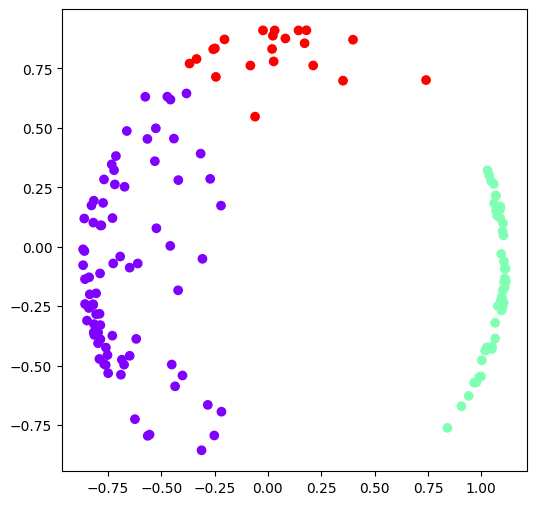

In [6]:
ac3 = AgglomerativeClustering(n_clusters = 3)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

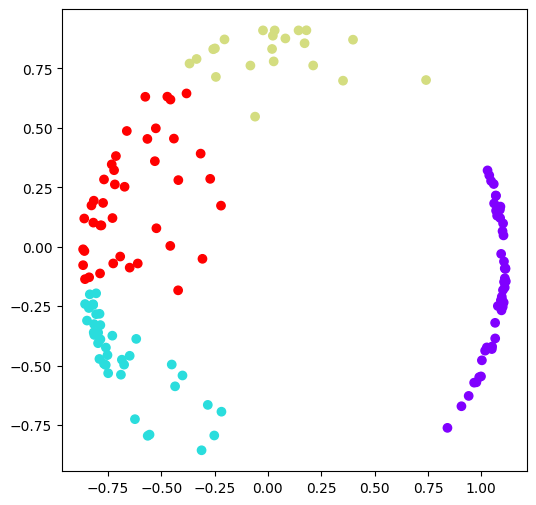

In [7]:
ac4 = AgglomerativeClustering(n_clusters = 4)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [8]:
import numpy as np;
import pandas as pd
num_clusters = 0
mat = np.array([[0,2,6,10,9],[2,0,5,9,8],[6,5,0,4,5],[10,9,4,0,3],[9,8,5,3,0]])
all_elements = ['a','b','c','d','e']
dissimilarity_matrix = pd.DataFrame(mat,index=all_elements, columns=all_elements)


def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index
    

current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


print(level, current_clusters)

1 [['a', 'b', 'c', 'd', 'e']]
2 [['c', 'd', 'e'], ['a', 'b']]
3 [['a', 'b'], ['d', 'e'], ['c']]
4 [['a', 'b'], ['c'], ['e'], ['d']]
5 [['c'], ['e'], ['d'], ['b'], ['a']]


C:\Users\ravir\AppData\Local\Temp\ipykernel_8416\496512609.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  sc.dendrogram(sc.linkage(dissimilarity_matrix, method='complete'))


Text(0, 0.5, 'Euclidean\xa0distance')

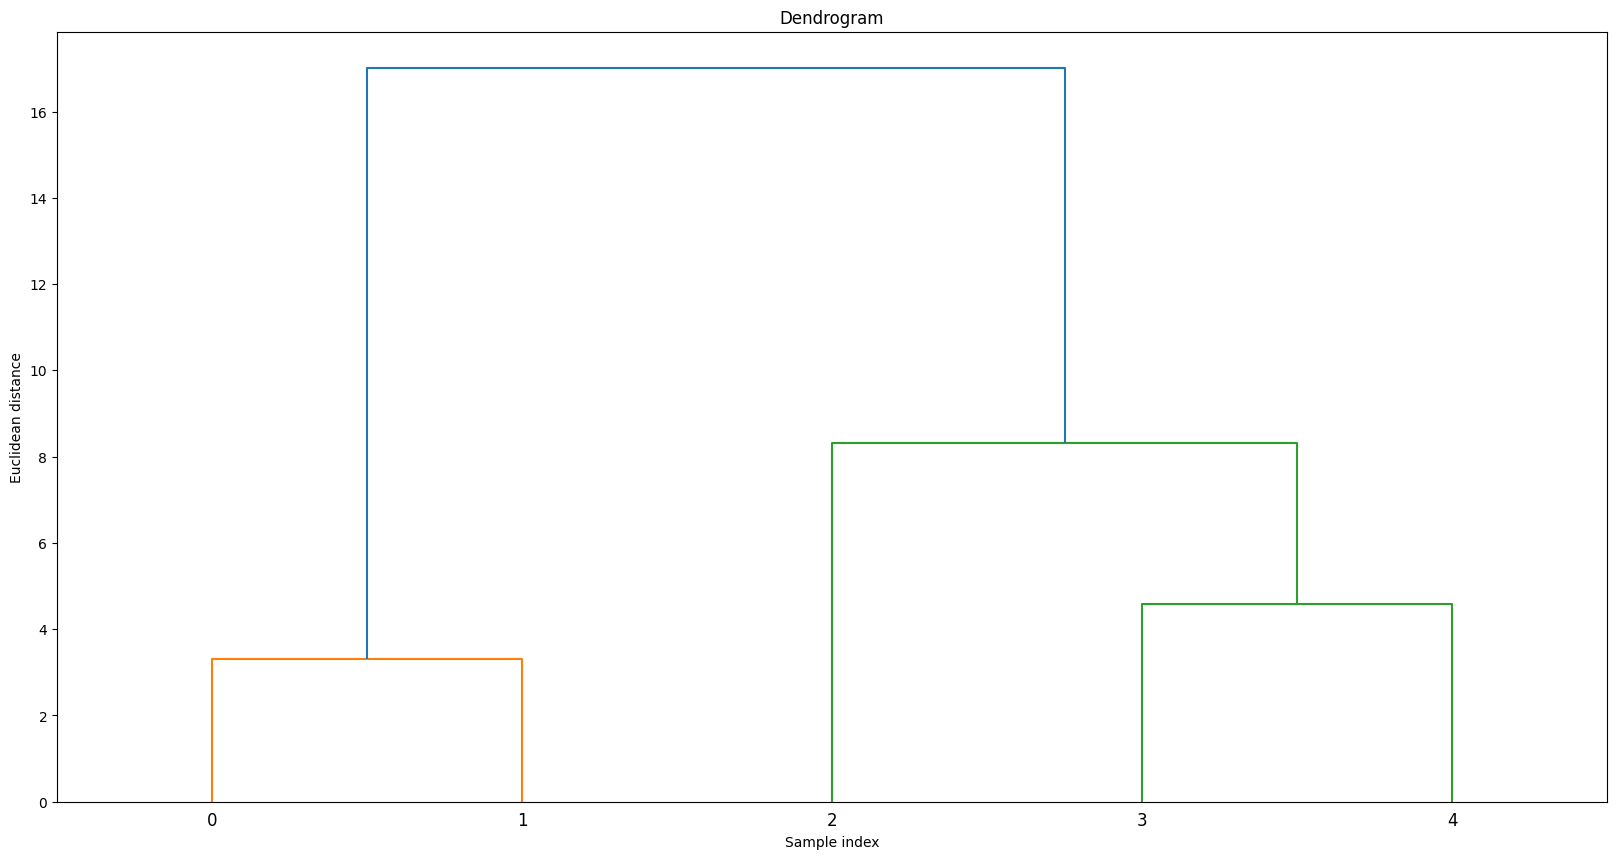

In [9]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
sc.dendrogram(sc.linkage(dissimilarity_matrix, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')


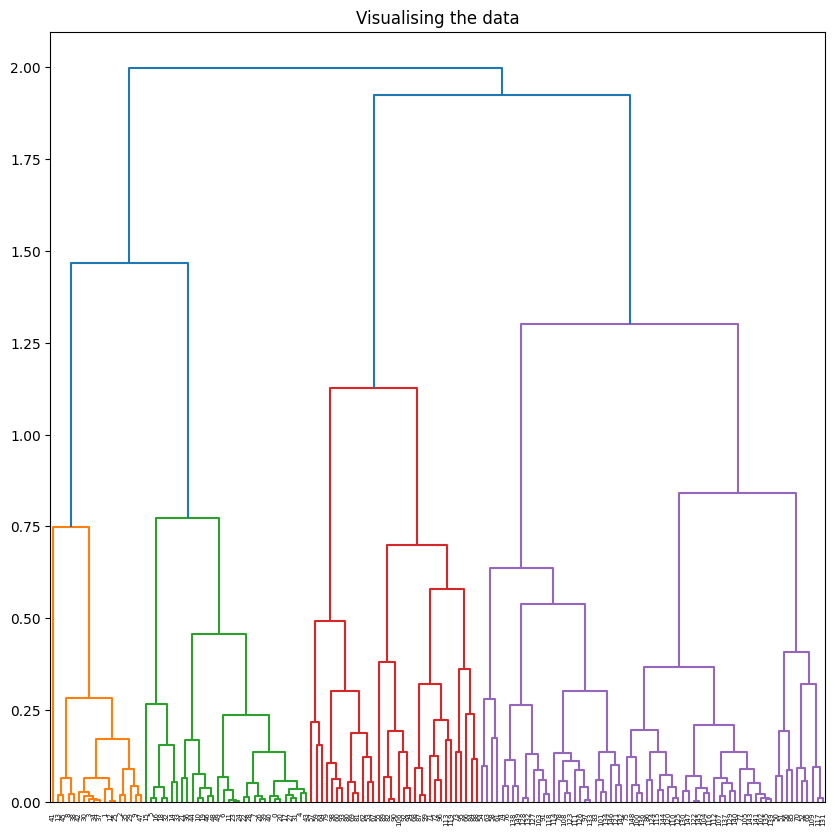

In [10]:
plt.figure(figsize =(10, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='complete')))

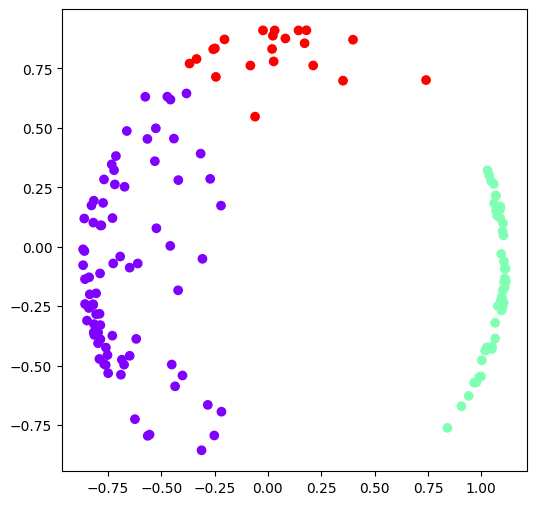

In [11]:

ac3 = AgglomerativeClustering(n_clusters = 3)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()